## EDA on Final Dataset

In [1]:
#import requried libraries
import pandas as pd
pd.options.display.max_rows = 5
pd.options.display.max_columns=25

import numpy as np
import random as rand

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('paper')

from pandas.api.types import CategoricalDtype


inputfile = 'CKME136X10_2018_Clean_Data.csv'

In [2]:
# read data
df = pd.read_csv(inputfile, engine = 'python')

In [3]:
def typecast(df):
    df = df.astype('category')
    df['C_MNTH'] = df['C_MNTH'].astype(CategoricalDtype(ordered=True))
    df['C_WDAY'] = df['C_WDAY'].astype(CategoricalDtype(ordered=True))
    df['C_HOUR'] = df['C_HOUR'].astype(CategoricalDtype(ordered=True))
    df['C_VEHS'] = df['C_VEHS'].astype(CategoricalDtype(ordered=True))
    df['P_PSN'] = df['P_PSN'].astype(CategoricalDtype(ordered=True))
    df['P_AGE'] = df['P_AGE'].astype('int')
    df['P_ISEV'] = df['P_ISEV'].astype('int')
    return df

In [4]:
df = typecast(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4816153 entries, 0 to 4816152
Data columns (total 15 columns):
C_MNTH    category
C_WDAY    category
C_HOUR    category
C_VEHS    category
C_CONF    category
C_RCFG    category
C_WTHR    category
C_RSUR    category
C_RALN    category
C_TRAF    category
P_SEX     category
P_AGE     int32
P_PSN     category
P_USER    category
P_ISEV    int32
dtypes: category(13), int32(2)
memory usage: 96.5 MB


In [17]:
df['P_ISEV'].unique()
display(df.groupby(df['P_ISEV']).size())

P_ISEV
1    2045770
2    2733818
3      36565
dtype: int64

In [26]:
df.shape

(4816153, 15)

In [30]:
print((df.groupby(df['P_ISEV']).size()[1]/df.shape[0])*100)
print((df.groupby(df['P_ISEV']).size()[2]/df.shape[0])*100)
print((df.groupby(df['P_ISEV']).size()[3]/df.shape[0])*100)

42.47726349225201
56.76352059413395
0.7592159136140402


In [5]:
df_copy = df.copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002068BBEAE80>,
      dtype=object)

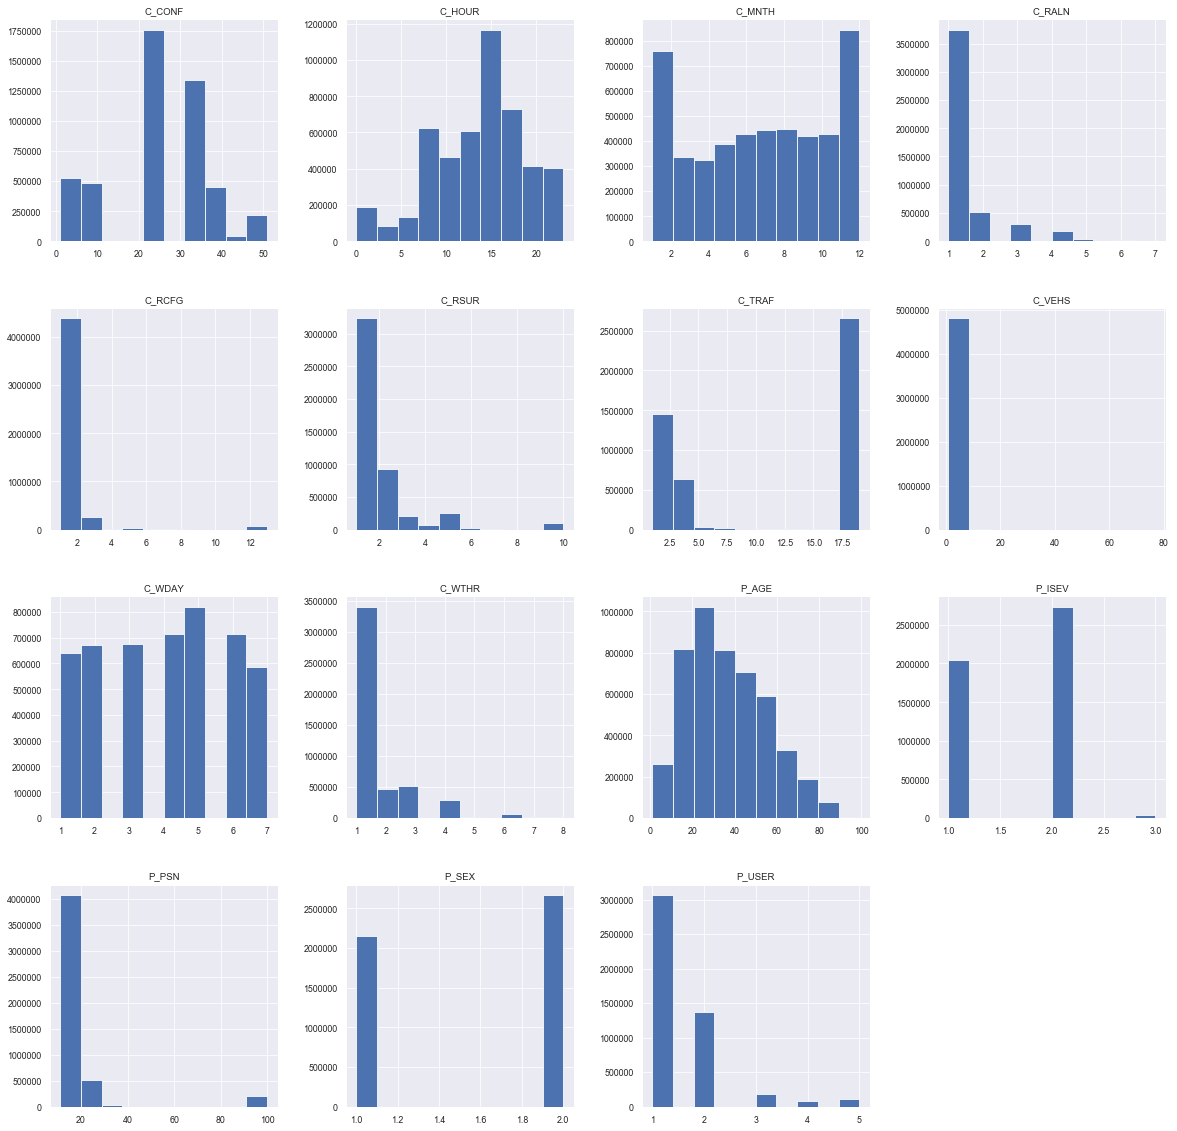

In [31]:
df.astype('int').hist(figsize = [20, 20])

In [7]:
df_fatal = df[df['P_ISEV'] == 3]
df_injury = df[df['P_ISEV'] == 2]
df_safe = df[df['P_ISEV'] == 1]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206821F2C88>,
      dtype=object)

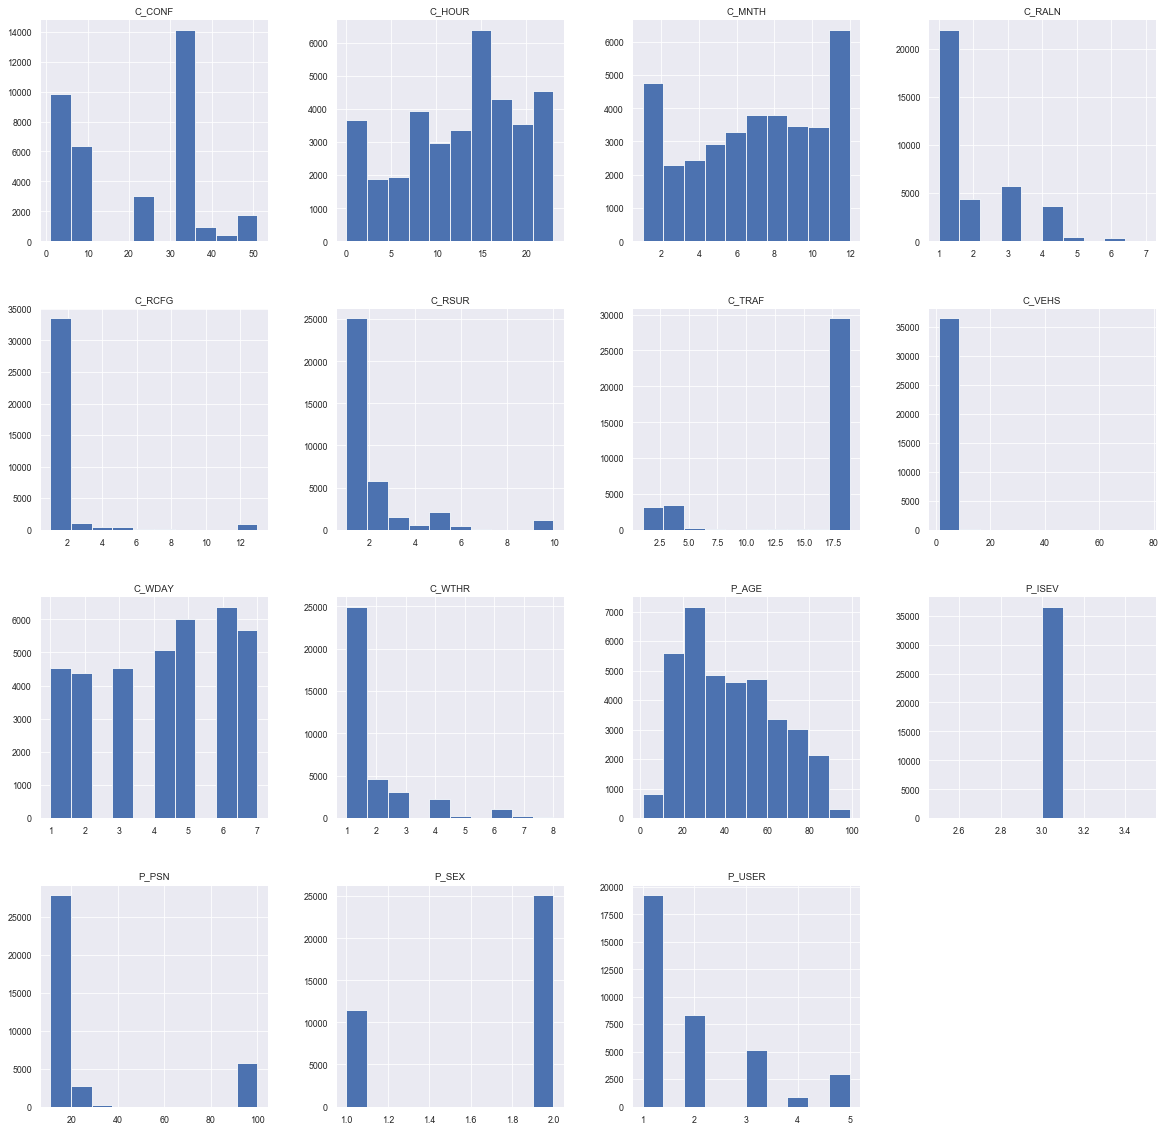

In [8]:
df_fatal.astype('int').hist(figsize = [20, 20])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020688EAF470>,
      dtype=object)

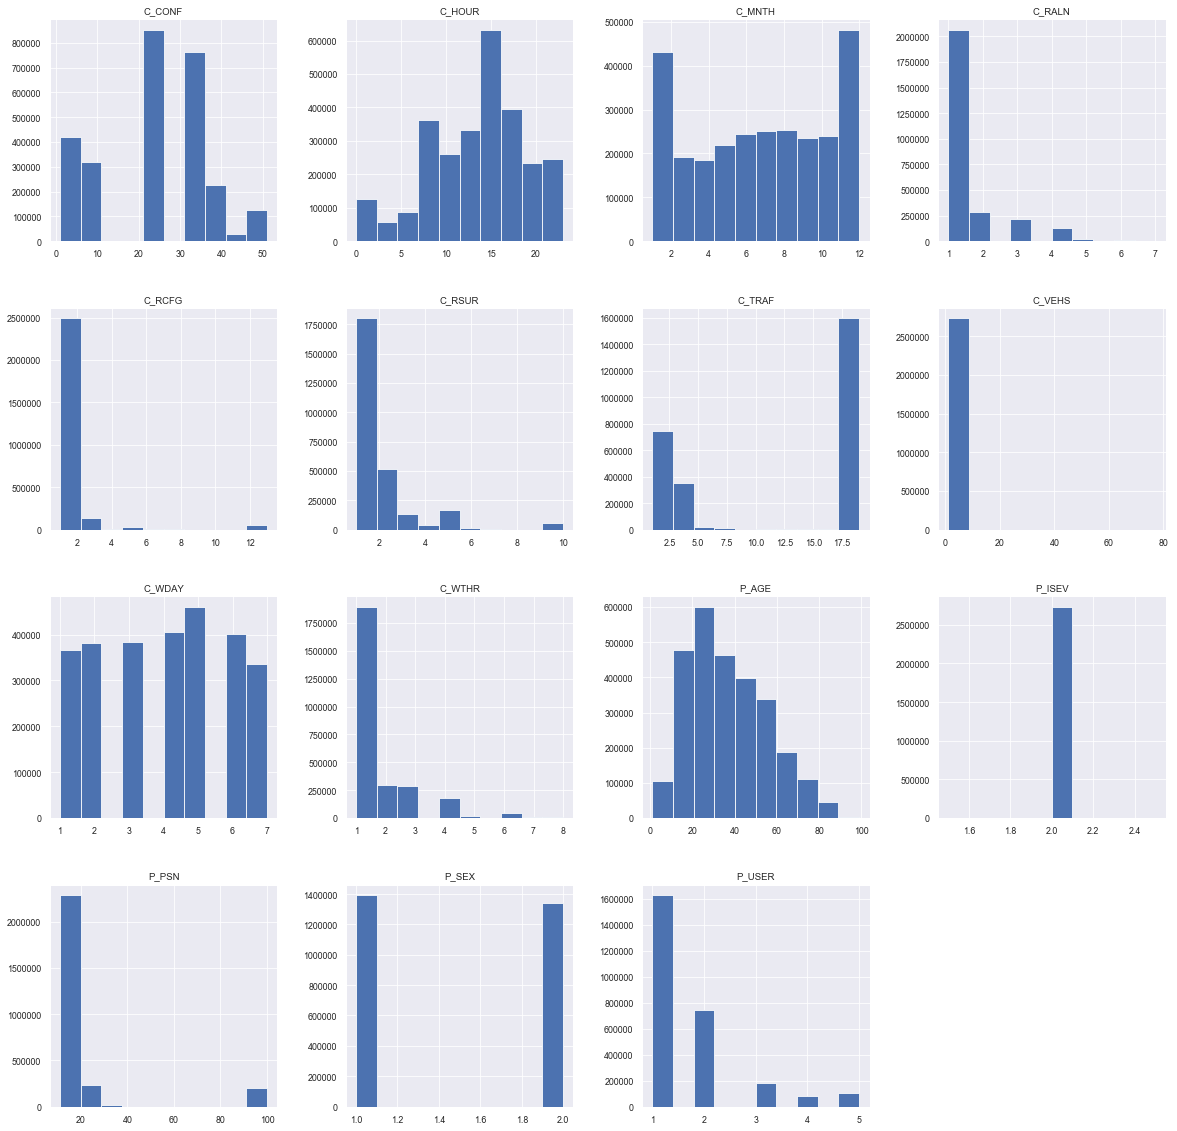

In [9]:
df_injury.astype('int').hist(figsize = [20, 20])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27576eb8>,
      dtype=object)

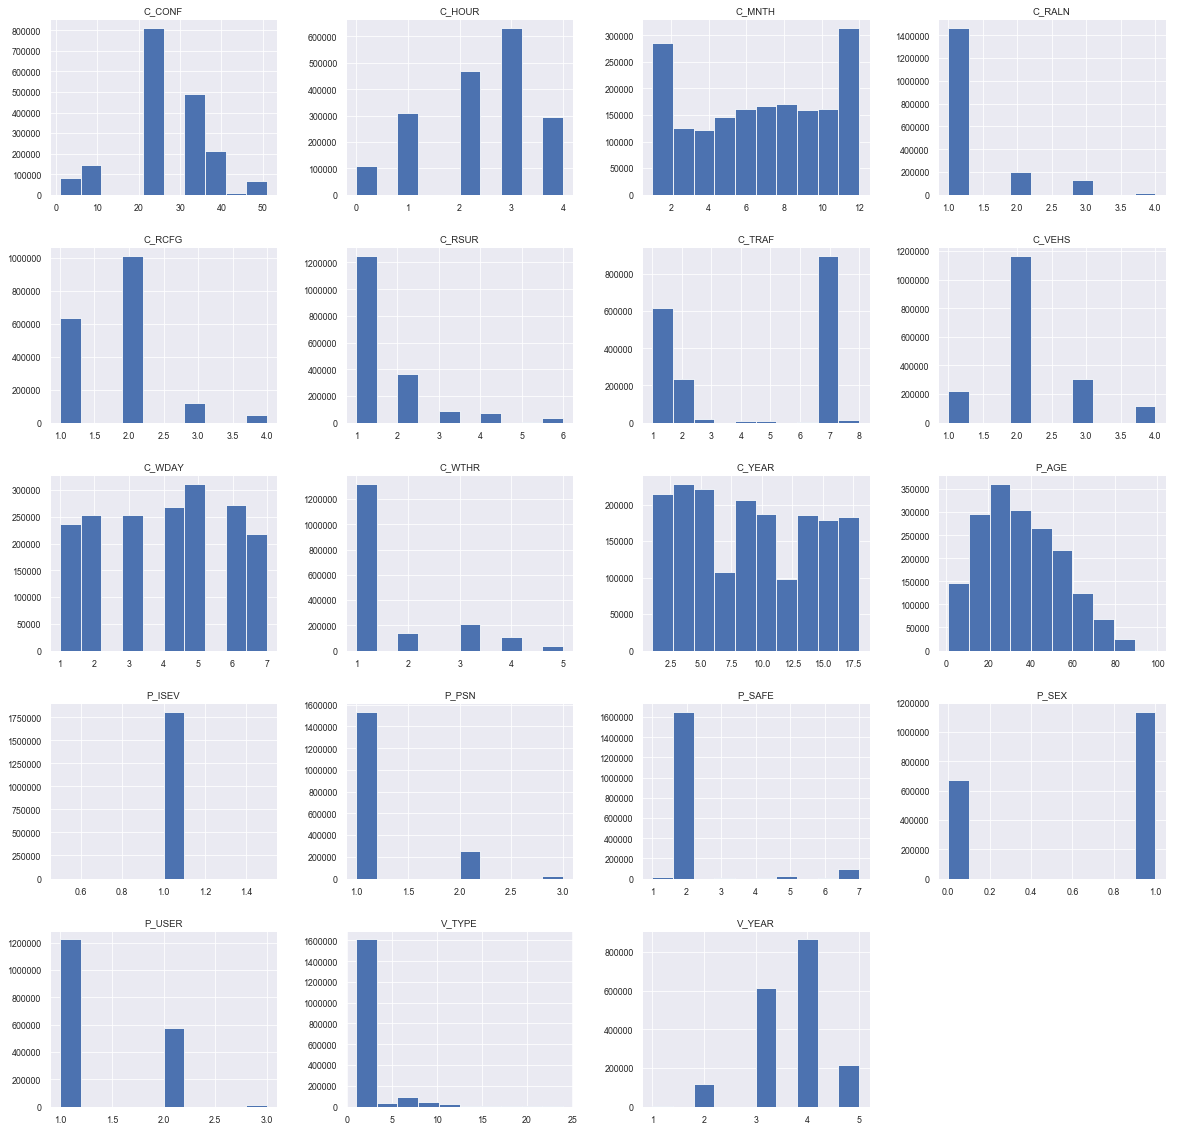

In [28]:
df_safe.astype('int').hist(figsize = [20, 20])

In [10]:
xt = df['C_YEAR'].unique()

KeyError: 'C_YEAR'

C_YEAR
1     1998
2     2099
      ... 
17    1263
18    1201
Name: 3, Length: 18, dtype: int64
P_ISEV       1       2     3
C_YEAR                      
1        98799  149783  1998
2       116158  162473  2099
...        ...     ...   ...
17       92971  118661  1263
18       89989  120605  1201

[18 rows x 3 columns]


(1, 17)

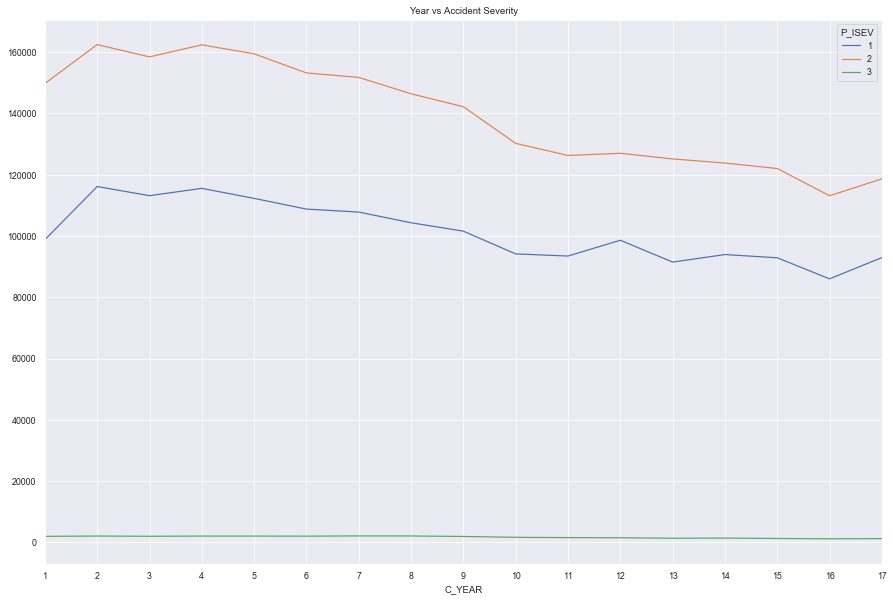

In [61]:
print(df.groupby(['C_YEAR', 'P_ISEV']).size().unstack()[3])
print(df.groupby(['C_YEAR', 'P_ISEV']).size().unstack())
ax = df.astype('int').groupby(['C_YEAR', 'P_ISEV']).size().unstack().plot(figsize=(15,10), kind='line', title = 'Year vs Accident Severity',  xticks = xt)
ax.set_xlim((1,17))

(1, 17)

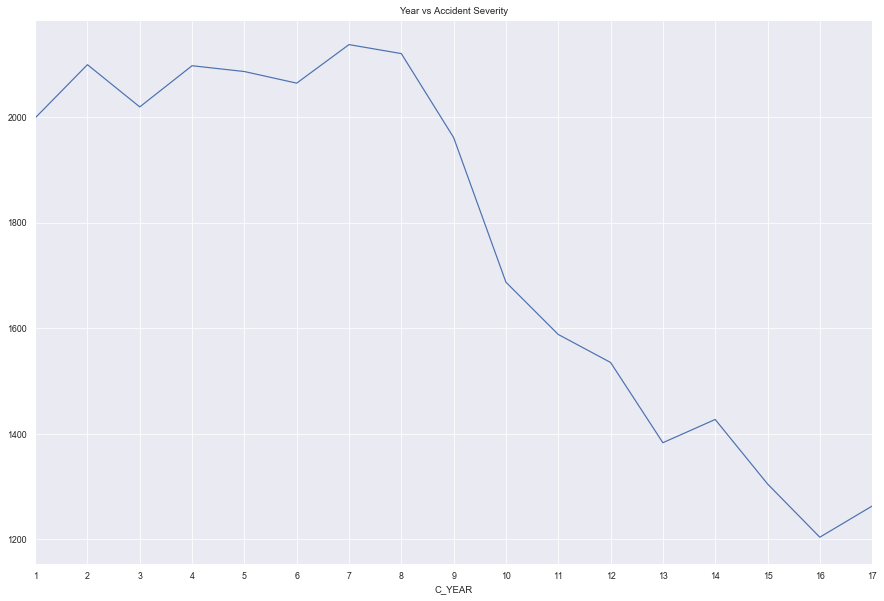

In [62]:
bx = df.astype('int').groupby(['C_YEAR', 'P_ISEV']).size().unstack()[3].plot(figsize=(15,10), kind='line', title = 'Year vs Accident Severity',  xticks = xt)
bx.set_xlim((1,17))

In [31]:
df.dtypes

C_YEAR    category
C_MNTH    category
            ...   
P_USER    category
P_ISEV    category
Length: 19, dtype: object

In [72]:
def plot_year_vs_cat(data, x, y, title, xt):
    data.astype('int').groupby([x,y]).size().unstack().plot(figsize=(15,4), kind='line', title = title, xticks = xt)
    plt.show()
def plot_year_vs_cat_fatal(data, x, y, title, xt):
    xp = data.astype('int').groupby([x,y]).size().unstack()[3].plot(figsize=(15,4), kind='line', title = title, xticks = xt)
    plt.show()

In [73]:
df.columns

Index(['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR', 'C_VEHS', 'C_CONF', 'C_RCFG',
       'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_TYPE', 'V_YEAR', 'P_SEX',
       'P_AGE', 'P_PSN', 'P_SAFE', 'P_USER', 'P_ISEV'],
      dtype='object')

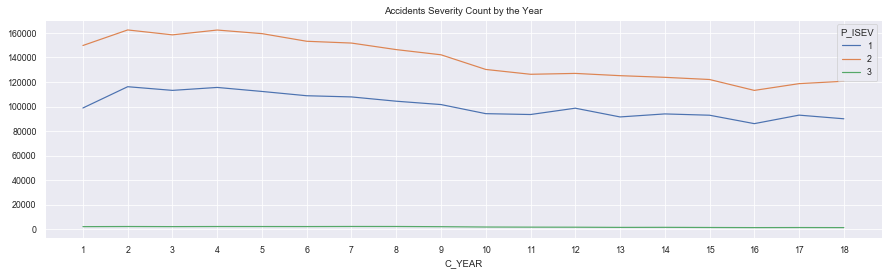

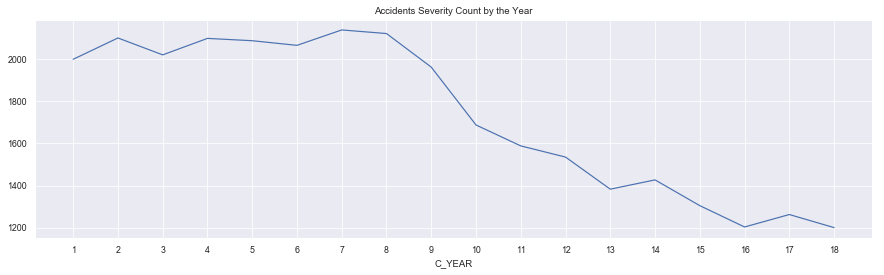

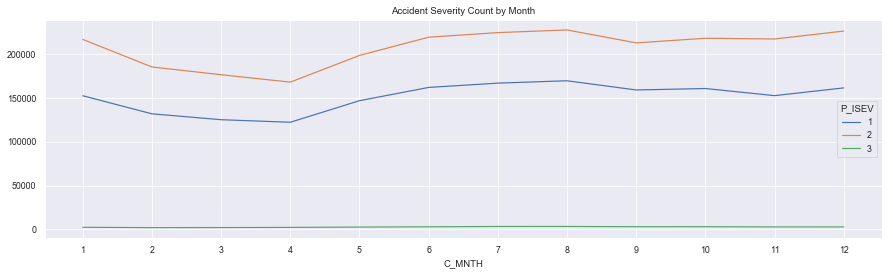

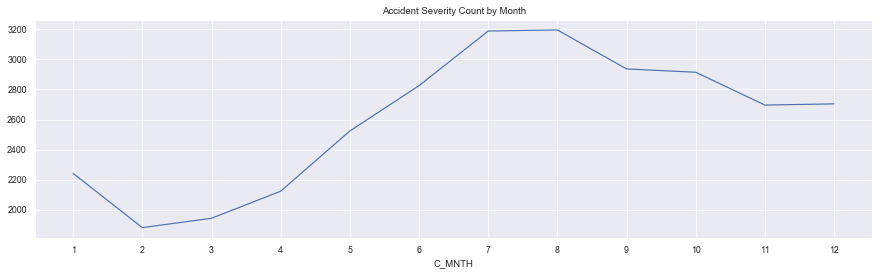

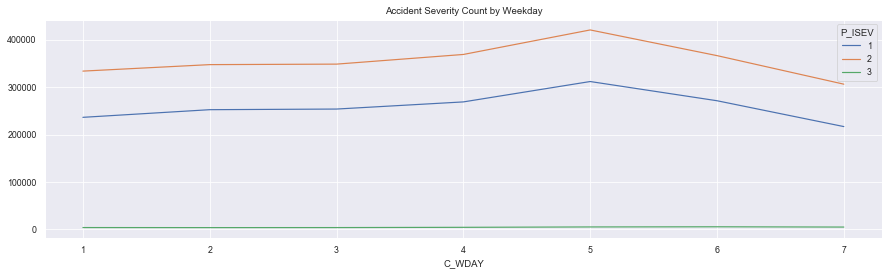

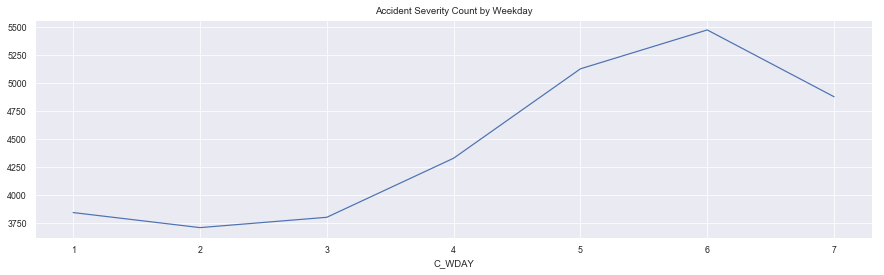

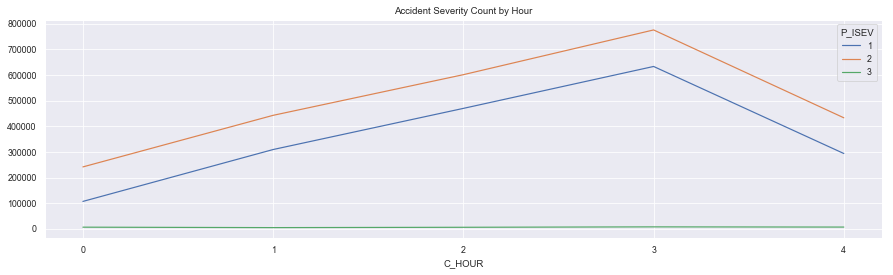

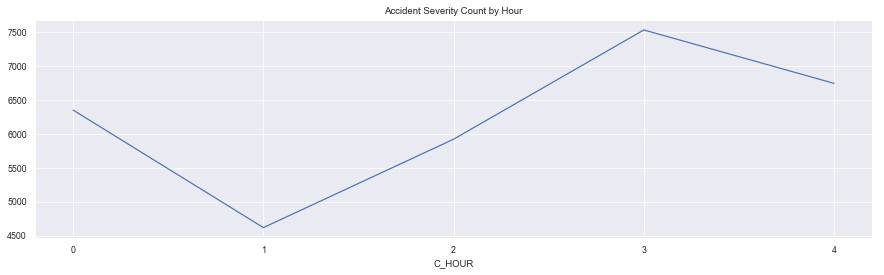

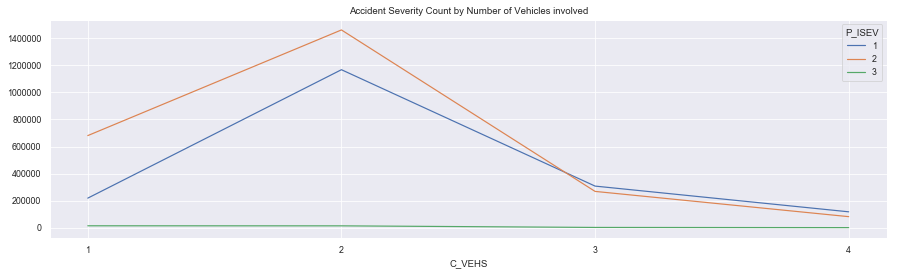

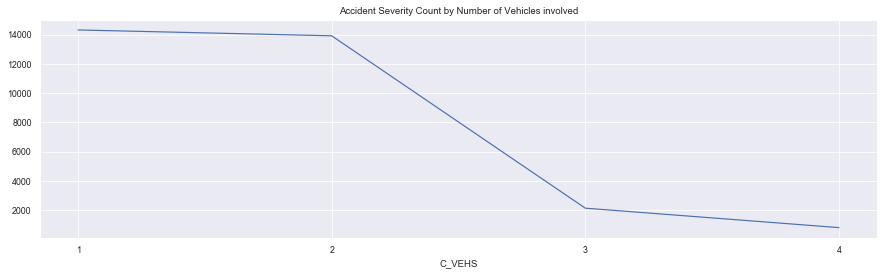

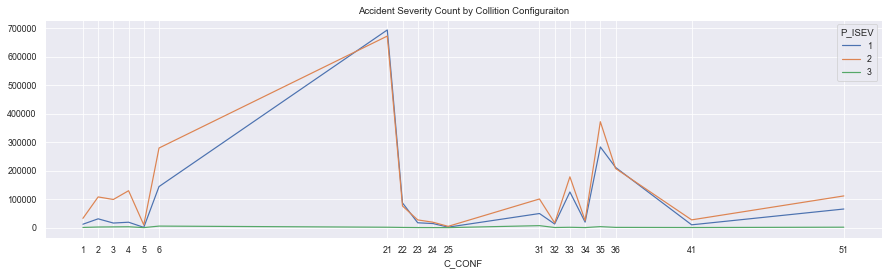

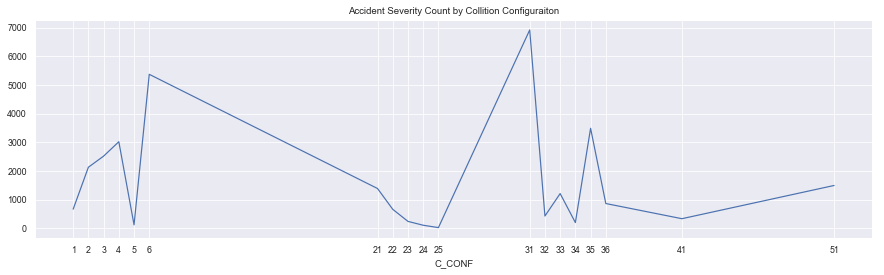

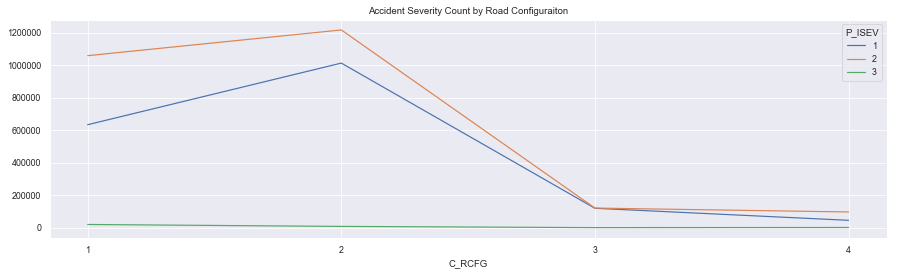

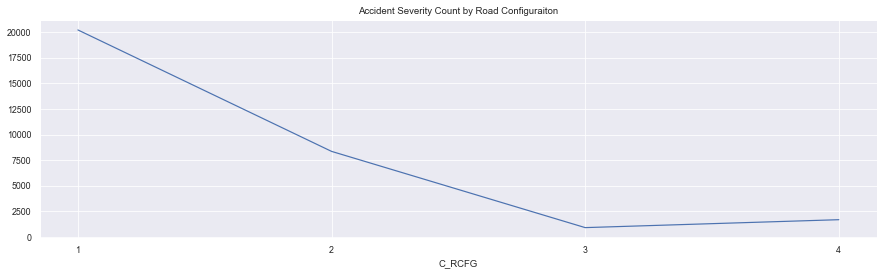

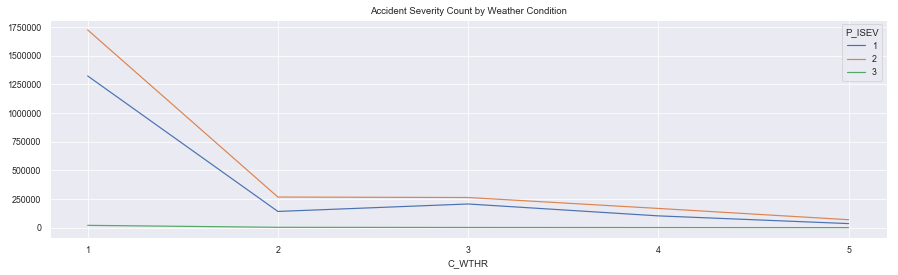

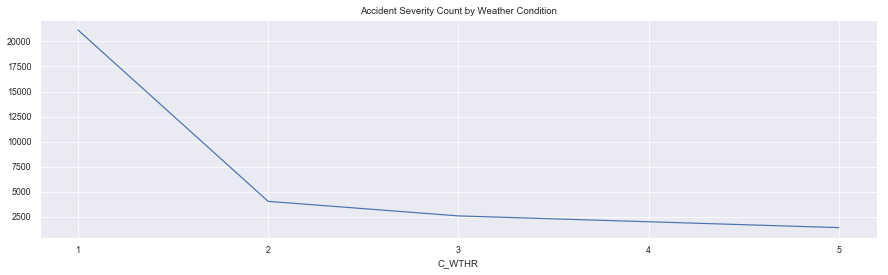

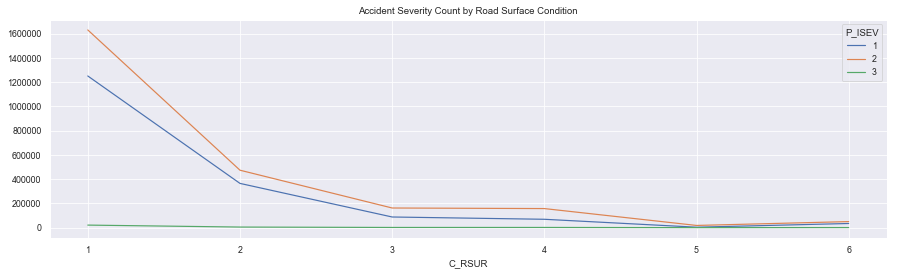

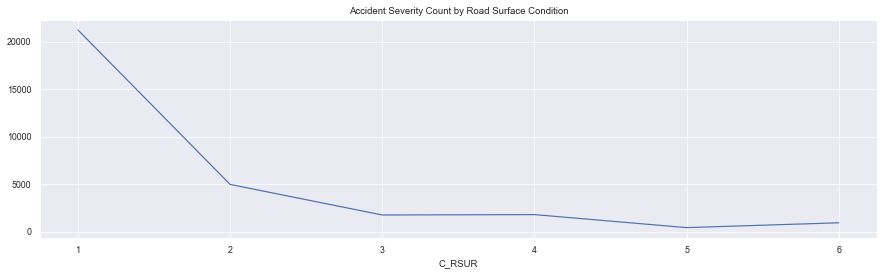

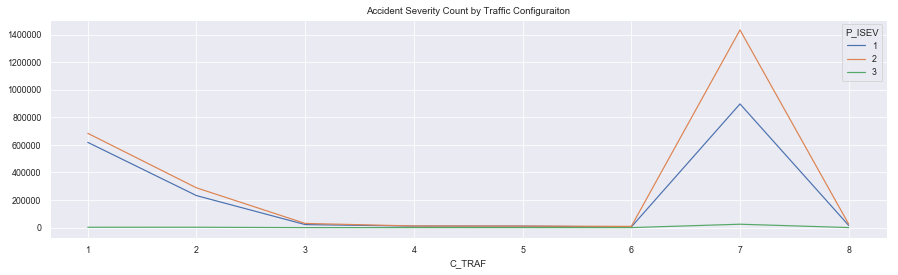

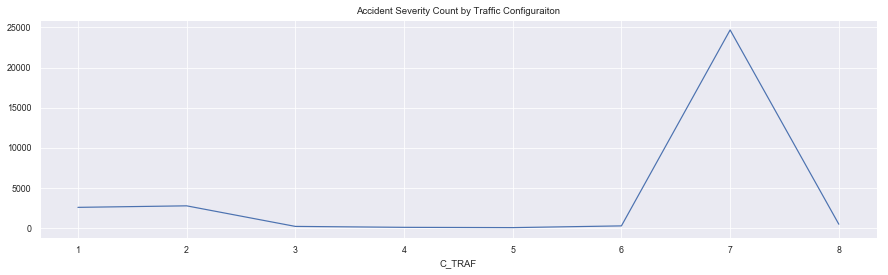

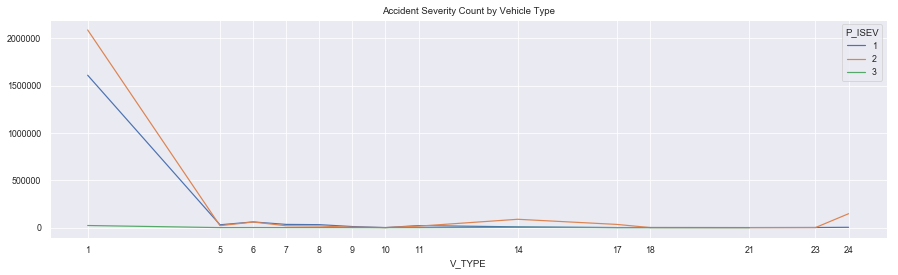

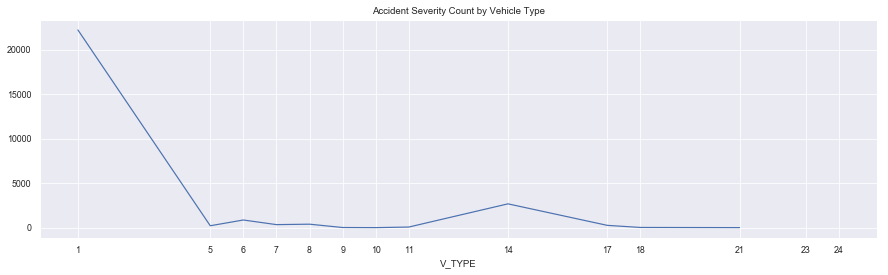

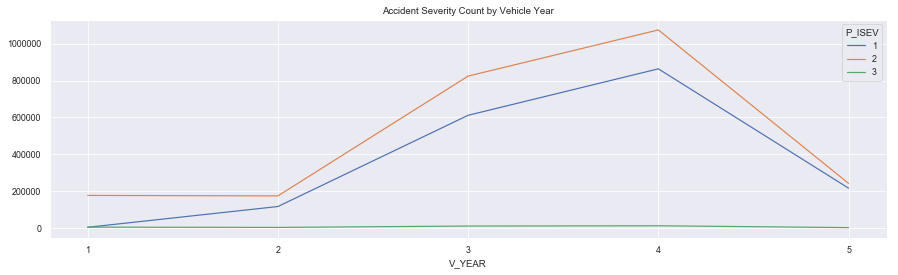

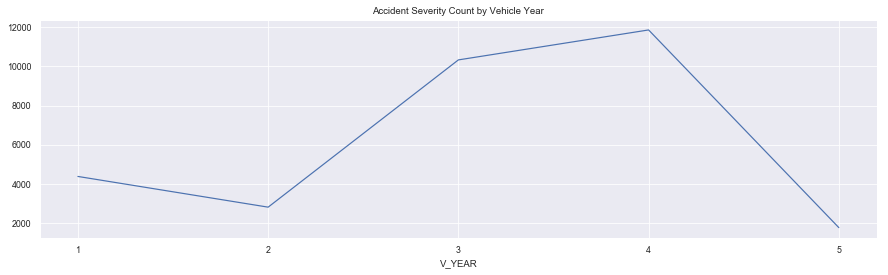

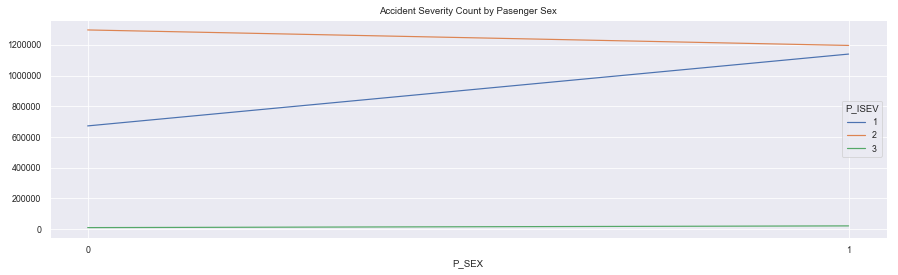

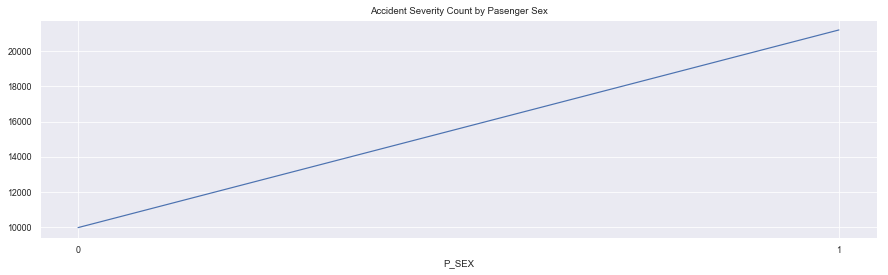

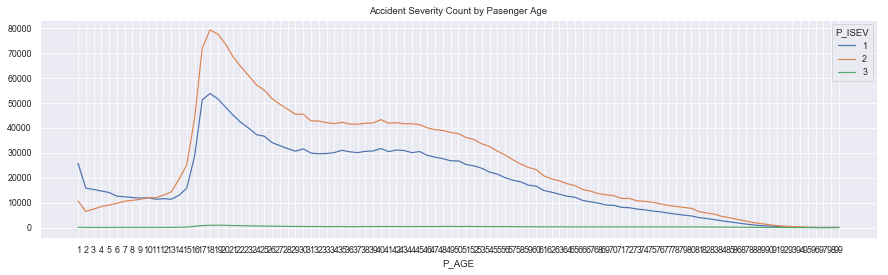

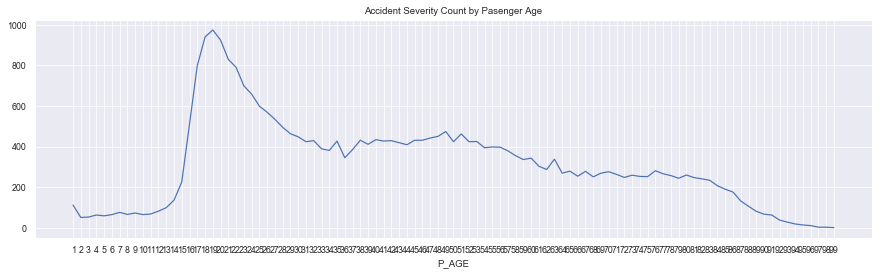

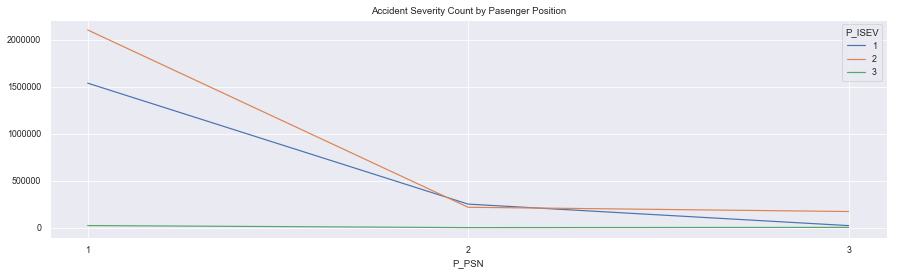

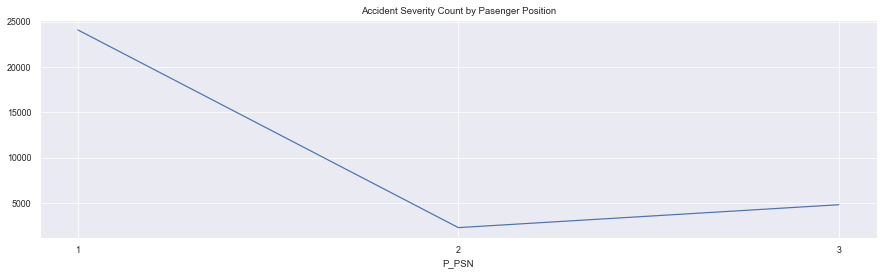

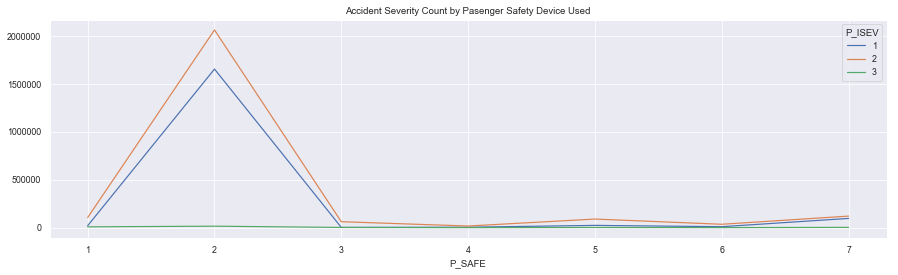

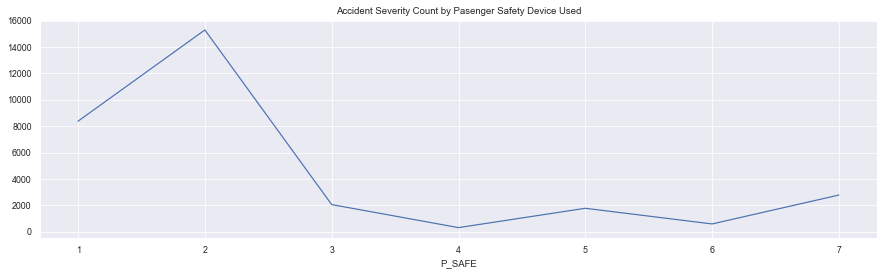

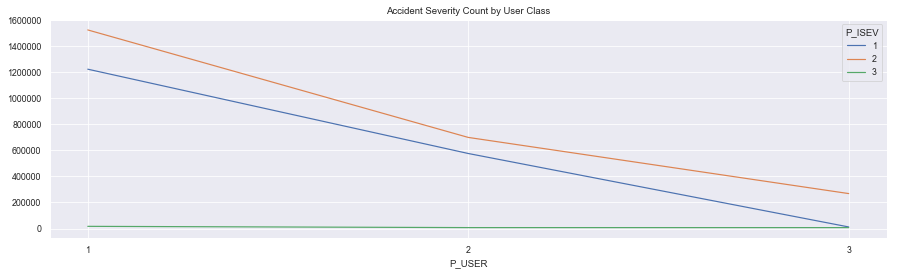

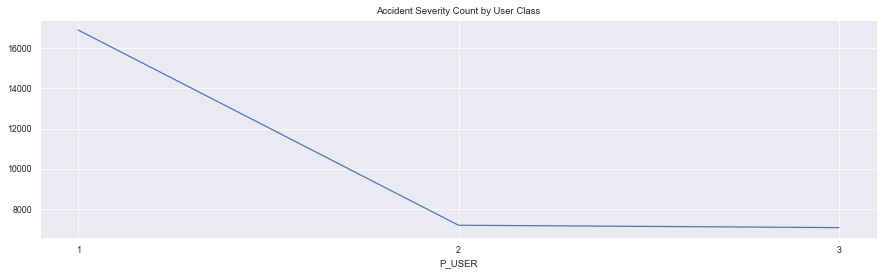

In [74]:
title = "Accidents Severity Count by the Year"
xt = df['C_YEAR'].unique()
plot_year_vs_cat(df, 'C_YEAR', 'P_ISEV', title, xt)
plot_year_vs_cat_fatal(df, 'C_YEAR', 'P_ISEV', title, xt)

title = "Accident Severity Count by Month"
xt = df['C_MNTH'].unique()
plot_year_vs_cat(df, 'C_MNTH', 'P_ISEV', title, xt)
plot_year_vs_cat_fatal(df, 'C_MNTH', 'P_ISEV', title, xt)

title = "Accident Severity Count by Weekday"
xt = df['C_WDAY'].unique()
plot_year_vs_cat(df, 'C_WDAY', 'P_ISEV', title, xt)
plot_year_vs_cat_fatal(df, 'C_WDAY', 'P_ISEV', title, xt)

title = "Accident Severity Count by Hour"
xt = df['C_HOUR'].unique()
plot_year_vs_cat(df, 'C_HOUR', 'P_ISEV', title, xt)
plot_year_vs_cat_fatal(df, 'C_HOUR', 'P_ISEV', title, xt)

title = "Accident Severity Count by Number of Vehicles involved"
xt = df['C_VEHS'].unique()
plot_year_vs_cat(df, 'C_VEHS', 'P_ISEV', title, xt)
plot_year_vs_cat_fatal(df, 'C_VEHS', 'P_ISEV', title, xt)

title = "Accident Severity Count by Collition Configuraiton"
xt = df['C_CONF'].unique()
plot_year_vs_cat(df, 'C_CONF', 'P_ISEV', title, xt)
plot_year_vs_cat_fatal(df, 'C_CONF', 'P_ISEV', title, xt)

title = "Accident Severity Count by Road Configuraiton"
xt = df['C_RCFG'].unique()
plot_year_vs_cat(df, 'C_RCFG', 'P_ISEV', title, xt)
plot_year_vs_cat_fatal(df, 'C_RCFG', 'P_ISEV', title, xt)

title = "Accident Severity Count by Weather Condition"
xt = df['C_WTHR'].unique()
plot_year_vs_cat(df, 'C_WTHR', 'P_ISEV', title, xt)
plot_year_vs_cat_fatal(df, 'C_WTHR', 'P_ISEV', title, xt)

title = "Accident Severity Count by Road Surface Condition"
xt = df['C_RSUR'].unique()
plot_year_vs_cat(df, 'C_RSUR', 'P_ISEV', title, xt)
plot_year_vs_cat_fatal(df, 'C_RSUR', 'P_ISEV', title, xt)

title = "Accident Severity Count by Traffic Configuraiton"
xt = df['C_TRAF'].unique()
plot_year_vs_cat(df, 'C_TRAF', 'P_ISEV', title, xt)
plot_year_vs_cat_fatal(df, 'C_TRAF', 'P_ISEV', title, xt)

title = "Accident Severity Count by Vehicle Type"
xt = df['V_TYPE'].unique()
plot_year_vs_cat(df, 'V_TYPE', 'P_ISEV', title, xt)
plot_year_vs_cat_fatal(df, 'V_TYPE', 'P_ISEV', title, xt)

title = "Accident Severity Count by Vehicle Year"
xt = df['V_YEAR'].unique()
plot_year_vs_cat(df, 'V_YEAR', 'P_ISEV', title, xt)
plot_year_vs_cat_fatal(df, 'V_YEAR', 'P_ISEV', title, xt)

title = "Accident Severity Count by Pasenger Sex"
xt = df['P_SEX'].unique()
plot_year_vs_cat(df, 'P_SEX', 'P_ISEV', title, xt)
plot_year_vs_cat_fatal(df, 'P_SEX', 'P_ISEV', title, xt)

title = "Accident Severity Count by Pasenger Age"
xt = df['P_AGE'].unique()
plot_year_vs_cat(df, 'P_AGE', 'P_ISEV', title, xt)
plot_year_vs_cat_fatal(df, 'P_AGE', 'P_ISEV', title, xt)

title = "Accident Severity Count by Pasenger Position"
xt = df['P_PSN'].unique()
plot_year_vs_cat(df, 'P_PSN', 'P_ISEV', title, xt)
plot_year_vs_cat_fatal(df, 'P_PSN', 'P_ISEV', title, xt)

title = "Accident Severity Count by Pasenger Safety Device Used"
xt = df['P_SAFE'].unique()
plot_year_vs_cat(df, 'P_SAFE', 'P_ISEV', title, xt)
plot_year_vs_cat_fatal(df, 'P_SAFE', 'P_ISEV', title, xt)

title = "Accident Severity Count by User Class"
xt = df['P_USER'].unique()
plot_year_vs_cat(df, 'P_USER', 'P_ISEV', title, xt)
plot_year_vs_cat_fatal(df, 'P_USER', 'P_ISEV', title, xt)


,C_YEAR,fatal,injury,no_injury
0,1,1998,149783,98799
1,2,2099,162473,116158
...,...,...,...,...
16,17,1263,118661,92971
17,18,1201,120605,89989


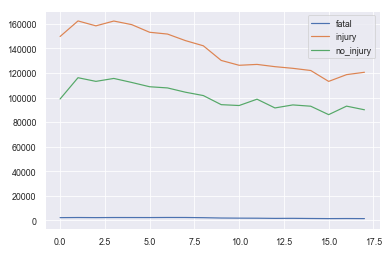

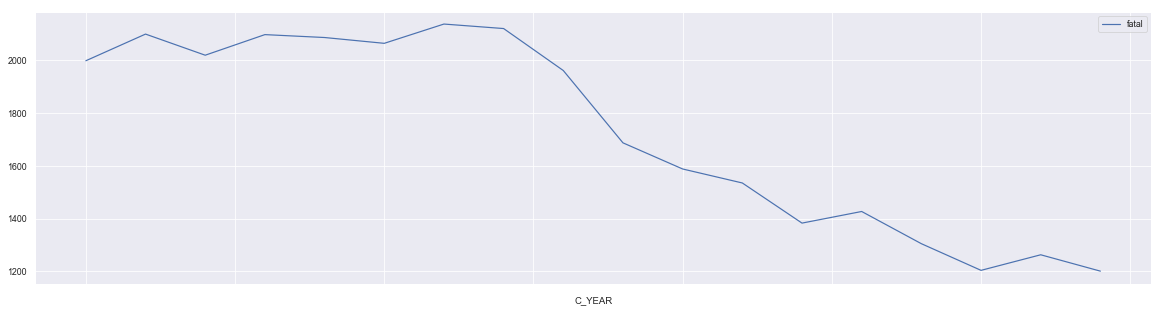

In [36]:
## Plot accident serverity by Year
df_tmp = df.copy()
df_tmp['fatal']=np.where(df_tmp['P_ISEV'] == 3,1,0)
df_tmp['injury']=np.where(df_tmp['P_ISEV'] == 2,1,0)
df_tmp['no_injury']=np.where(df_tmp['P_ISEV'] == 1,1,0)

df_plot = df_tmp.groupby('C_YEAR')['fatal','injury', 'no_injury'].sum()

tmp = df_plot.index
df_plot.reset_index(inplace=True)
df_plot['C_YEAR'] = tmp
display(df_plot)

df_plot.plot()
df_plot[['C_YEAR', 'fatal']].plot(x = 'C_YEAR', figsize = [20,5])